# Supervised Learning
## Decision Trees - Ensemble Implementation

Author: Bingchen Wang

Last Updated: 26 Oct, 2022

---
<nav>
    <a href="../../Machine%20Learning.ipynb">Machine Learning</a> |
    <a href="../Supervised Learning.ipynb">Supervised Learning</a> |
    <a href="../Decision Trees.ipynb">Decision Trees</a>
</nav>

---

In [1]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, gridspec
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd

/Users/bingchenwang/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Classification

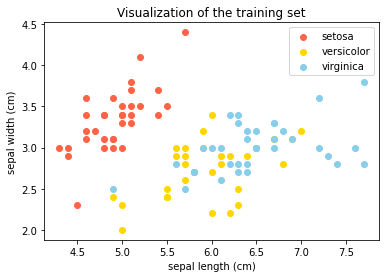

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=1)
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c = "tomato", label = iris.target_names[0])
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c = "gold", label = iris.target_names[1])
plt.scatter(X_train[y_train == 2,0], X_train[y_train == 2,1], c = "skyblue", label = iris.target_names[2])
plt.title('Visualization of the training set')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

In [59]:
DTC = DecisionTreeClassifier(ccp_alpha = 0.01)
DTC.fit(X_train[:,[0,1]], y_train)
train_pred = DTC.predict(X_train[:,[0,1]])
test_pred = DTC.predict(X_test[:,[0,1]])

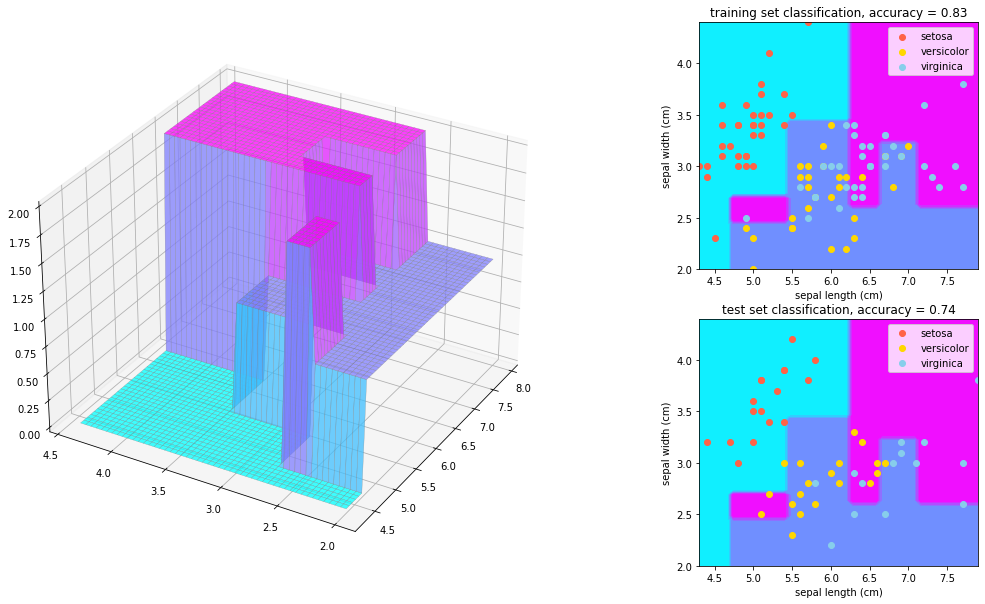

In [65]:
X1_min, X2_min = np.min(iris.data[:,[0,1]], axis = 0)
X1_max, X2_max = np.max(iris.data[:,[0,1]], axis = 0)
X1_span = np.linspace(X1_min, X1_max, 50)
X2_span = np.linspace(X2_min, X2_max, 50)
X1_space, X2_space = np.meshgrid(X1_span, X2_span)
#X_space = np.vstack((X_space[0].reshape(-1),X_space[1].reshape(-1))).transpose()
#leaves_space = DTC.apply(X_space)
#fit_space = DTC.predict(X_space)

fit_space = np.zeros(X1_space.shape)
d1, d2 = fit_space.shape
for i in range(d1):
    for j in range(d2):
        fit_space[i,j] = DTC.predict(np.array([[X1_space[i,j],X2_space[i,j]]]))

spec = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[3, 1], wspace=0)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(spec[:,0], projection='3d')
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,1])
ax1.plot_surface(X1_space, X2_space, fit_space, cmap=cm.cool, linewidth=0.3, alpha = 0.75, edgecolor = 'gray')
ax1.view_init(elev=30, azim=-150)

ax2.contourf(X1_space, X2_space, fit_space, cmap=cm.cool)
ax2.set_aspect('auto')
ax2.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c = "tomato", label = iris.target_names[0])
ax2.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c = "gold", label = iris.target_names[1])
ax2.scatter(X_train[y_train == 2,0], X_train[y_train == 2,1], c = "skyblue", label = iris.target_names[2])
ax2.set_title(f'training set classification, accuracy = {np.mean(train_pred == y_train)}')
ax2.set_xlabel(iris.feature_names[0])
ax2.set_ylabel(iris.feature_names[1])
ax2.legend()

ax3.contourf(X1_space, X2_space, fit_space, cmap=cm.cool)
ax3.set_aspect('auto')
ax3.scatter(X_test[y_test == 0,0], X_test[y_test == 0,1], c = "tomato", label = iris.target_names[0])
ax3.scatter(X_test[y_test == 1,0], X_test[y_test == 1,1], c = "gold", label = iris.target_names[1])
ax3.scatter(X_test[y_test == 2,0], X_test[y_test == 2,1], c = "skyblue", label = iris.target_names[2])
ax3.set_title(f'test set classification, accuracy = {np.mean(test_pred == y_test)}')
ax3.set_xlabel(iris.feature_names[0])
ax3.set_ylabel(iris.feature_names[1])
ax3.legend()

plt.show()

In [61]:
XGBC = XGBClassifier(n_estimators = 256, reg_alpha = 2)
XGBC.fit(X_train[:,[0,1]], y_train)
train_pred = XGBC.predict(X_train[:,[0,1]])
test_pred = XGBC.predict(X_test[:,[0,1]])

[14:55:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/bingchenwang/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


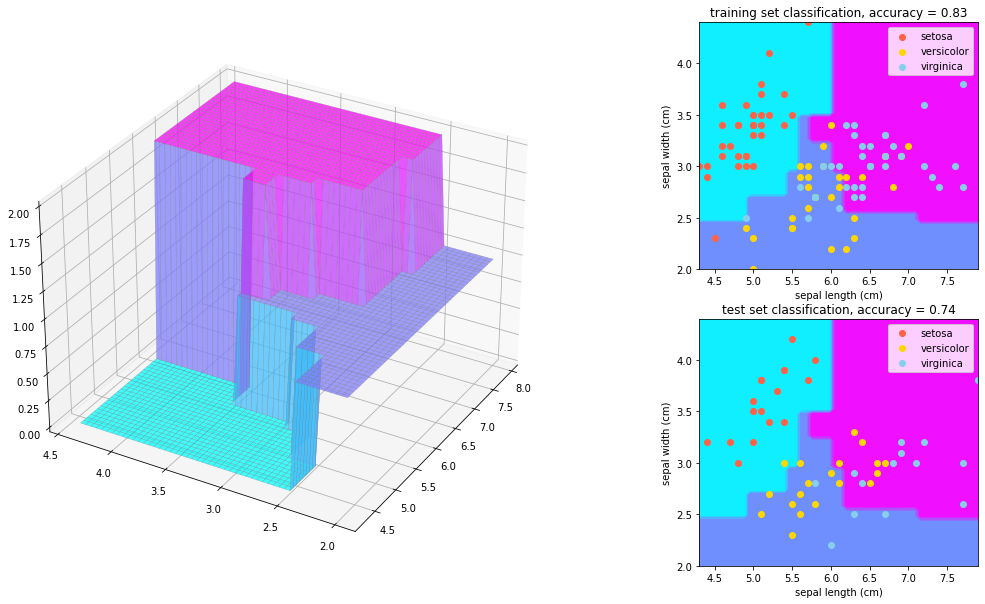

In [64]:
fit_space2 = np.zeros(X1_space.shape)
d1, d2 = fit_space.shape
for i in range(d1):
    for j in range(d2):
        fit_space2[i,j] = XGBC.predict(np.array([[X1_space[i,j],X2_space[i,j]]]))

spec = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[3, 1], wspace=0)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(spec[:,0], projection='3d')
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,1])
ax1.plot_surface(X1_space, X2_space, fit_space2, cmap=cm.cool, linewidth=0.3, alpha = 0.75, edgecolor = 'gray')
ax1.view_init(elev=30, azim=-150)

ax2.contourf(X1_space, X2_space, fit_space2, cmap=cm.cool)
ax2.set_aspect('auto')
ax2.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c = "tomato", label = iris.target_names[0])
ax2.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c = "gold", label = iris.target_names[1])
ax2.scatter(X_train[y_train == 2,0], X_train[y_train == 2,1], c = "skyblue", label = iris.target_names[2])
ax2.set_title(f'training set classification, accuracy = {np.mean(train_pred == y_train)}')
ax2.set_xlabel(iris.feature_names[0])
ax2.set_ylabel(iris.feature_names[1])
ax2.legend()

ax3.contourf(X1_space, X2_space, fit_space2, cmap=cm.cool)
ax3.set_aspect('auto')
ax3.scatter(X_test[y_test == 0,0], X_test[y_test == 0,1], c = "tomato", label = iris.target_names[0])
ax3.scatter(X_test[y_test == 1,0], X_test[y_test == 1,1], c = "gold", label = iris.target_names[1])
ax3.scatter(X_test[y_test == 2,0], X_test[y_test == 2,1], c = "skyblue", label = iris.target_names[2])
ax3.set_title(f'test set classification, accuracy = {np.mean(test_pred == y_test)}')
ax3.set_xlabel(iris.feature_names[0])
ax3.set_ylabel(iris.feature_names[1])
ax3.legend()

plt.show()

## Regression

In [3]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.33, random_state=1)

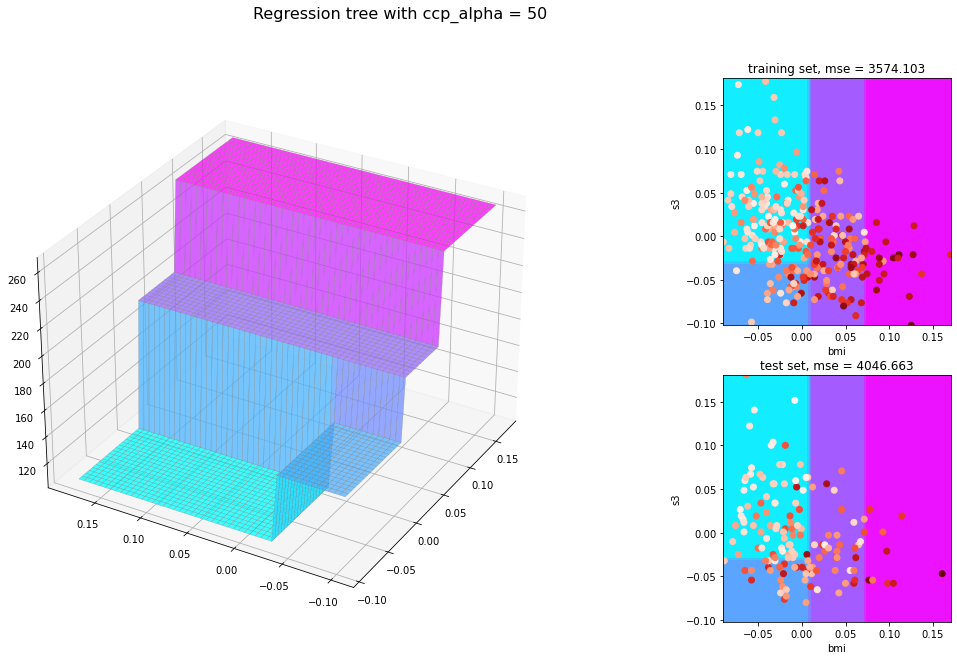

In [4]:
DTR = DecisionTreeRegressor(ccp_alpha = 100)
DTR.fit(X_train[:,[2,6]],y_train)

X1_min, X2_min = np.min(diabetes.data[:,[2,6]], axis = 0)
X1_max, X2_max = np.max(diabetes.data[:,[2,6]], axis = 0)
X1_span = np.linspace(X1_min, X1_max, 50)
X2_span = np.linspace(X2_min, X2_max, 50)
X1_space, X2_space = np.meshgrid(X1_span, X2_span)

fit_space = np.zeros(X1_space.shape)
d1, d2 = fit_space.shape
for i in range(d1):
    for j in range(d2):
        fit_space[i,j] = DTR.predict(np.array([[X1_space[i,j],X2_space[i,j]]]))
        
spec = gridspec.GridSpec(ncols=2, nrows=2, width_ratios=[3, 1], wspace=0)
fig = plt.figure(figsize=(20,10))
fig.suptitle("Regression tree with ccp_alpha = 50", fontsize = 16)
ax1 = fig.add_subplot(spec[:,0], projection='3d')
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,1])
ax1.plot_surface(X1_space, X2_space, fit_space, cmap=cm.cool, linewidth=0.3, alpha = 0.75, edgecolor = 'gray')
ax1.view_init(elev=30, azim=-150)

ax2.contourf(X1_space, X2_space, fit_space, cmap=cm.cool)
ax2.set_aspect('equal')
ax2.scatter(X_train[:,2], X_train[:,6], c = y_train, cmap = "Reds")
ax2.set_title(f'training set, mse = {np.round(mean_squared_error(y_train, DTR.predict(X_train[:,[2,6]])), 3)}')
ax2.set_xlabel(diabetes.feature_names[2])
ax2.set_ylabel(diabetes.feature_names[6])

ax3.contourf(X1_space, X2_space, fit_space, cmap=cm.cool)
ax3.set_aspect('equal')
ax3.scatter(X_test[:,2], X_test[:,6], c = y_test, cmap = "Reds")
ax3.set_title(f'test set, mse = {np.round(mean_squared_error(y_test, DTR.predict(X_test[:,[2,6]])), 3)}')
ax3.set_xlabel(diabetes.feature_names[2])
ax3.set_ylabel(diabetes.feature_names[6])

plt.show()

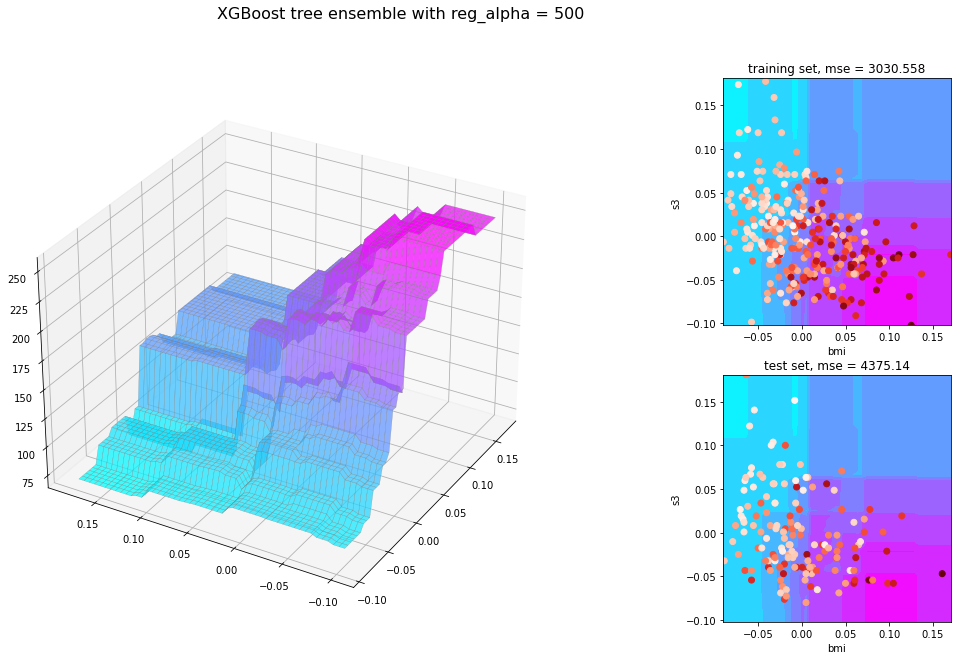

In [5]:
XGBR = XGBRegressor(n_estimators = 128, reg_alpha = 500)
XGBR.fit(X_train[:,[2,6]],y_train)

fit_space2 = np.zeros(X1_space.shape)
for i in range(d1):
    for j in range(d2):
        fit_space2[i,j] = XGBR.predict(np.array([[X1_space[i,j],X2_space[i,j]]]))
        
spec = gridspec.GridSpec(ncols=2, nrows=2, width_ratios=[3, 1], wspace=0)
fig = plt.figure(figsize=(20,10))
fig.suptitle("XGBoost tree ensemble with reg_alpha = 500", fontsize = 16)
ax1 = fig.add_subplot(spec[:,0], projection='3d')
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,1])
ax1.plot_surface(X1_space, X2_space, fit_space2, cmap=cm.cool, linewidth=0.3, alpha = 0.75, edgecolor = 'gray')
ax1.view_init(elev=30, azim=-150)

ax2.contourf(X1_space, X2_space, fit_space2, cmap=cm.cool)
ax2.set_aspect('equal')
ax2.scatter(X_train[:,2], X_train[:,6], c = y_train, cmap = "Reds")
ax2.set_title(f'training set, mse = {np.round(mean_squared_error(y_train, XGBR.predict(X_train[:,[2,6]])), 3)}')
ax2.set_xlabel(diabetes.feature_names[2])
ax2.set_ylabel(diabetes.feature_names[6])

ax3.contourf(X1_space, X2_space, fit_space2, cmap=cm.cool)
ax3.set_aspect('equal')
ax3.scatter(X_test[:,2], X_test[:,6], c = y_test, cmap = "Reds")
ax3.set_title(f'test set, mse = {np.round(mean_squared_error(y_test, XGBR.predict(X_test[:,[2,6]])), 3)}')
ax3.set_xlabel(diabetes.feature_names[2])
ax3.set_ylabel(diabetes.feature_names[6])

plt.show()

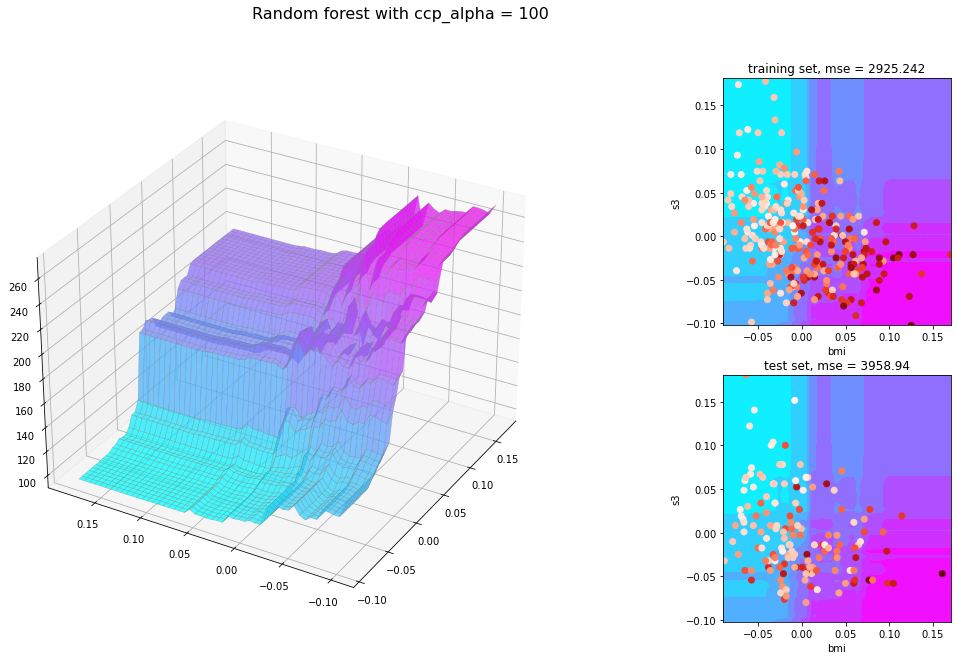

In [10]:
RFR = RandomForestRegressor(n_estimators = 128, random_state = 1, max_features = "sqrt", ccp_alpha = 100)
RFR.fit(X_train[:,[2,6]],y_train)

fit_space3 = np.zeros(X1_space.shape)
for i in range(d1):
    for j in range(d2):
        fit_space3[i,j] = RFR.predict(np.array([[X1_space[i,j],X2_space[i,j]]]))
        
spec = gridspec.GridSpec(ncols=2, nrows=2, width_ratios=[3, 1], wspace=0)
fig = plt.figure(figsize=(20,10))
fig.suptitle("Random forest with ccp_alpha = 100", fontsize = 16)
ax1 = fig.add_subplot(spec[:,0], projection='3d')
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,1])
ax1.plot_surface(X1_space, X2_space, fit_space3, cmap=cm.cool, linewidth=0.3, alpha = 0.75, edgecolor = 'gray')
ax1.view_init(elev=30, azim=-150)

ax2.contourf(X1_space, X2_space, fit_space3, cmap=cm.cool)
ax2.set_aspect('equal')
ax2.scatter(X_train[:,2], X_train[:,6], c = y_train, cmap = "Reds")
ax2.set_title(f'training set, mse = {np.round(mean_squared_error(y_train, RFR.predict(X_train[:,[2,6]])), 3)}')
ax2.set_xlabel(diabetes.feature_names[2])
ax2.set_ylabel(diabetes.feature_names[6])

ax3.contourf(X1_space, X2_space, fit_space3, cmap=cm.cool)
ax3.set_aspect('equal')
ax3.scatter(X_test[:,2], X_test[:,6], c = y_test, cmap = "Reds")
ax3.set_title(f'test set, mse = {np.round(mean_squared_error(y_test, RFR.predict(X_test[:,[2,6]])), 3)}')
ax3.set_xlabel(diabetes.feature_names[2])
ax3.set_ylabel(diabetes.feature_names[6])

plt.show()